In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [266]:
dataset=pd.read_csv('/content/Algerian_forest_fires_dataset.csv')

In [267]:
dataset.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [268]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


DATA CLEANING

In [269]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


Dataset is converted into two sets based on the region from 123rd index, we can make a new column based on the Region

1:"Bejaia Region Dataset"
2:"Sidi-Bel Abbes Region Dataset"

Add new column with region

In [270]:
dataset.loc[:123,'Region']=0
dataset.loc[123:,'Region']=1
df=dataset

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


In [272]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [273]:
df[['Region']]=df[['Region']].astype(int)

In [274]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [275]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [276]:
df=df.dropna().reset_index(drop=True)

In [277]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [278]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [279]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0


In [280]:
## remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [281]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [282]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [283]:
# List all column names
print("Columns in DataFrame:", df.columns)

# Strip spaces and standardize column names
df.columns = df.columns.str.strip()

# Verify if 'RH' and 'Ws' exist
print('RH exists:', 'RH' in df.columns)
print('Ws exists:', 'Ws' in df.columns)

# Convert data types for valid columns
columns_to_convert = ['month', 'day', 'year', 'Temperature', 'RH', 'Ws']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].astype(int)
    else:
        print(f"Column '{col}' not found in the DataFrame")


Columns in DataFrame: Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')
RH exists: True
Ws exists: True


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.2+ KB


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.2+ KB


In [286]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Changing the column to float data type

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.2+ KB


In [288]:
# Convert columns with object type to float, excluding the 'Classes' column
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Classes':  # Exclude the 'Classes' column
        try:
            df[col] = df[col].astype(float)
        except ValueError as e:
            print(f"Error converting column '{col}' to float: {e}")

# Verify the changes
print(df.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


In [289]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,240.000000,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,15.933333,7.520833,2012.0,32.175000,61.883333,15.525000,0.744583,78.142500,14.833333,49.950417,4.795417,16.864583,7.121250,0.491667
std,8.761110,1.108914,0.0,3.642296,14.846598,2.813484,2.003149,14.177495,12.394305,47.734390,4.152745,14.231127,7.446968,0.500975
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.675000,5.950000,14.700000,1.475000,6.175000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.350000,33.750000,3.600000,12.500000,4.800000,0.000000
75%,23.250000,8.250000,2012.0,35.000000,73.250000,17.000000,0.425000,88.300000,20.900000,71.075000,7.300000,22.900000,11.675000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [290]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [291]:
## Let ave the cleaned dataet
df.to_csv('/content/Algerian_forest_fires_dataset.csv',index=False)

**EXploratory Data Anlysis**

In [292]:
## drop Date,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [293]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [294]:
## categories in classes
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,98
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [295]:
## encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not'),0,1)

In [296]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [297]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [298]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,103


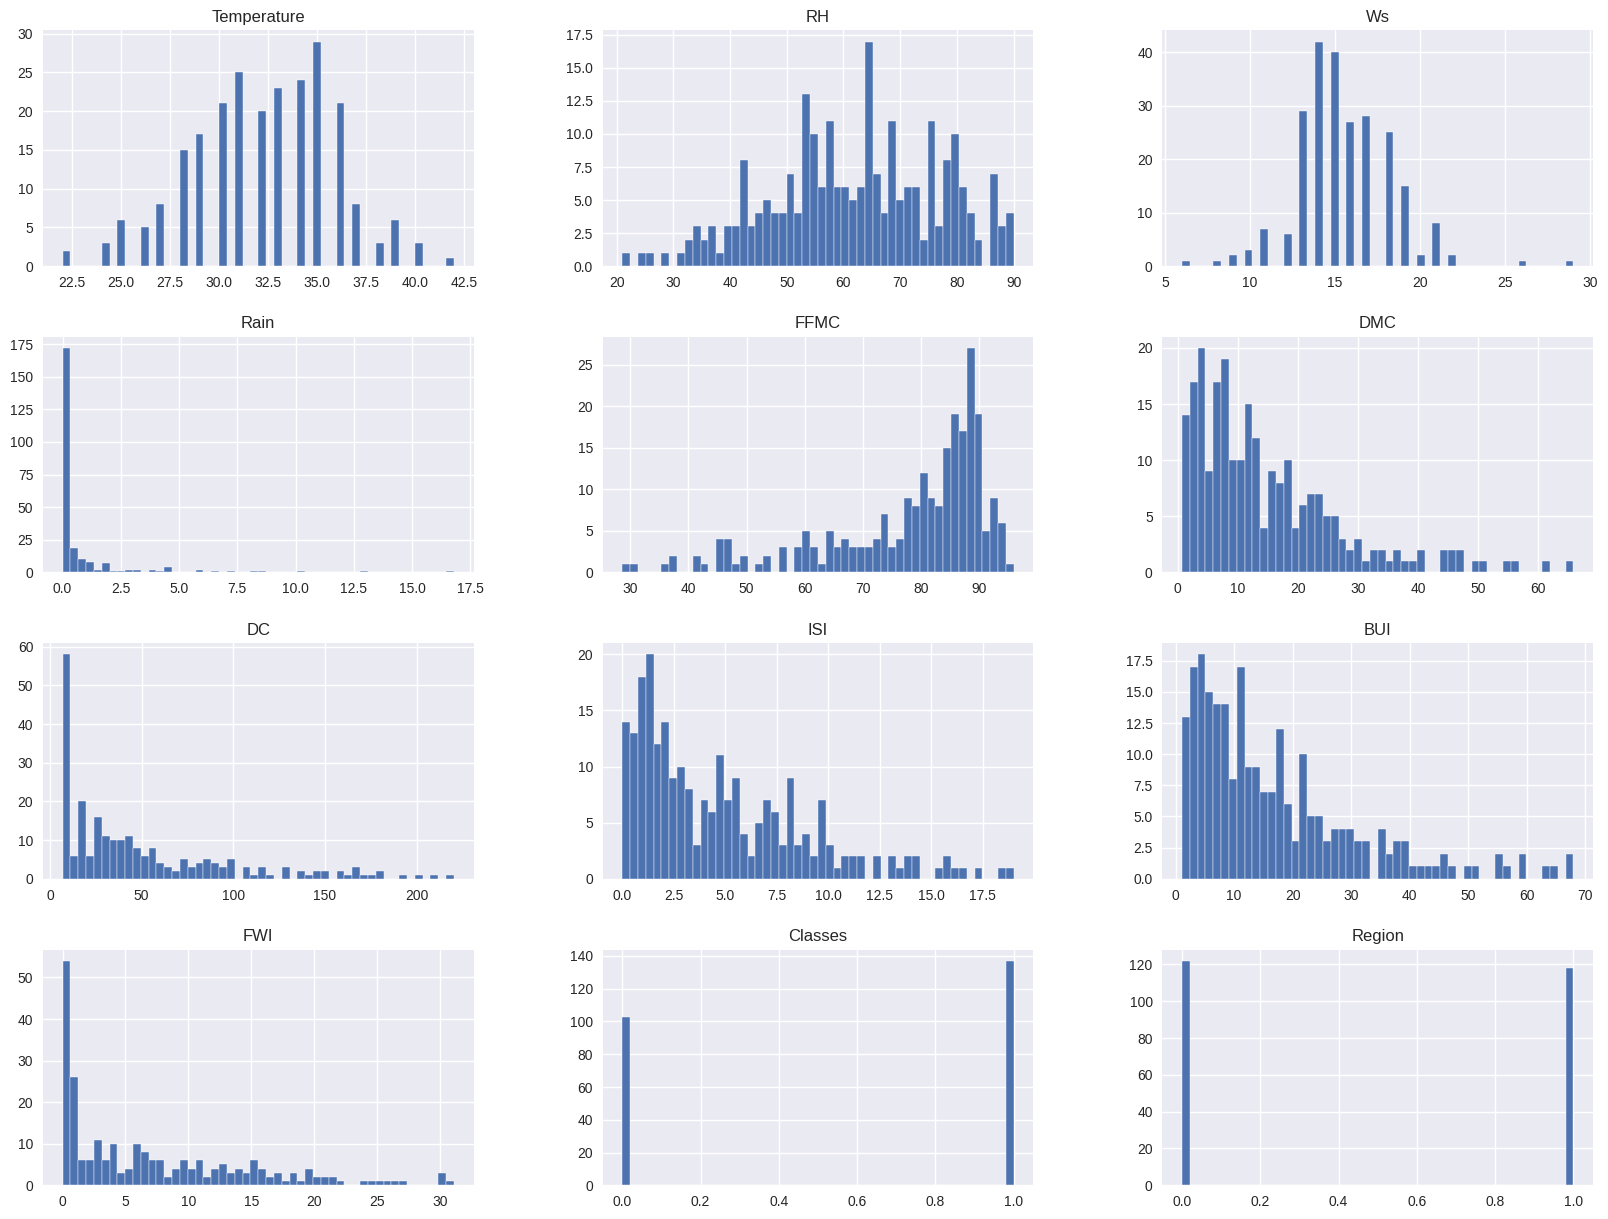

In [299]:
## Plot density plot for all features
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn to make its styles available

## Plot density plot for all features
# Apply the Seaborn style
plt.style.use('seaborn-v0_8')  # or use 'seaborn-v0_8' if you only want the basic Seaborn style without importing it
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()


In [300]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

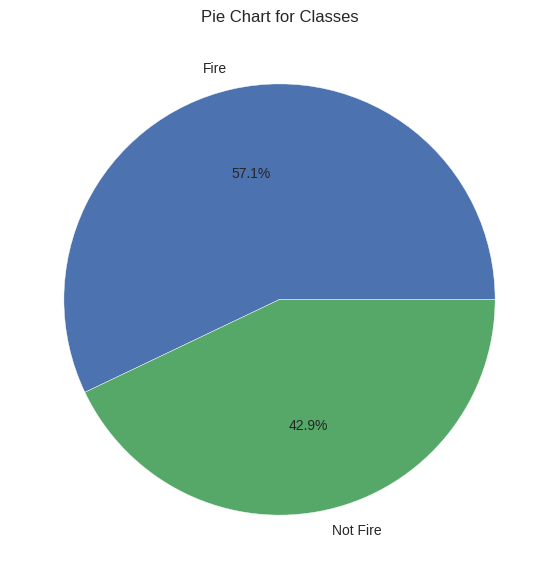

In [301]:
## plotting the piechart

classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart for Classes")
plt.show()

In [302]:
## Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649802,-0.291140,-0.323022,0.678971,0.483523,0.373420,0.602681,0.457422,0.565171,0.514226,0.278260
RH,-0.649802,1.000000,0.255299,0.216739,-0.640929,-0.402397,-0.219748,-0.683522,-0.347170,-0.577025,-0.425591,-0.418104
Ws,-0.291140,0.255299,1.000000,0.180838,-0.188755,-0.011795,0.070162,-0.002766,0.020802,0.022351,-0.083729,-0.172026
Rain,-0.323022,0.216739,0.180838,1.000000,-0.541563,-0.283254,-0.293190,-0.342487,-0.294472,-0.319623,-0.373995,-0.049869
FFMC,0.678971,-0.640929,-0.188755,-0.541563,1.000000,0.597287,0.500500,0.736569,0.585522,0.687824,0.765653,0.249356
DMC,0.483523,-0.402397,-0.011795,-0.283254,0.597287,1.000000,0.874645,0.676371,0.982032,0.874453,0.579844,0.207052
DC,0.373420,-0.219748,0.070162,-0.293190,0.500500,0.874645,1.000000,0.503163,0.941429,0.736874,0.505201,-0.068525
ISI,0.602681,-0.683522,-0.002766,-0.342487,0.736569,0.676371,0.503163,1.000000,0.639580,0.922033,0.731356,0.279636
BUI,0.457422,-0.347170,0.020802,-0.294472,0.585522,0.982032,0.941429,0.639580,1.000000,0.856361,0.580889,0.102985
FWI,0.565171,-0.577025,0.022351,-0.319623,0.687824,0.874453,0.736874,0.922033,0.856361,1.000000,0.715682,0.211173


<Axes: >

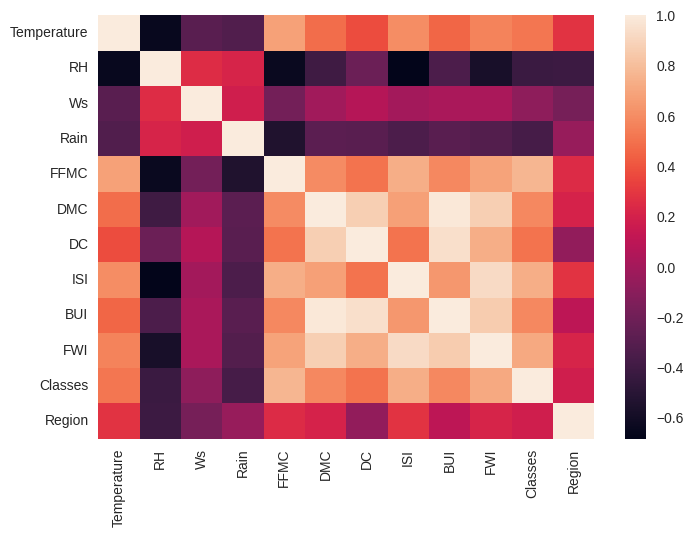

In [303]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

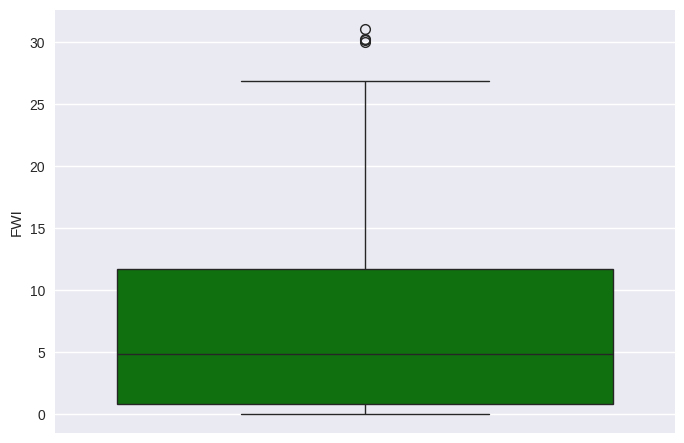

In [304]:
sns.boxplot(df_copy['FWI'],color='green')

In [305]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [306]:
df['Classes']

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
235,fire
236,not fire
237,not fire
238,not fire


In [307]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

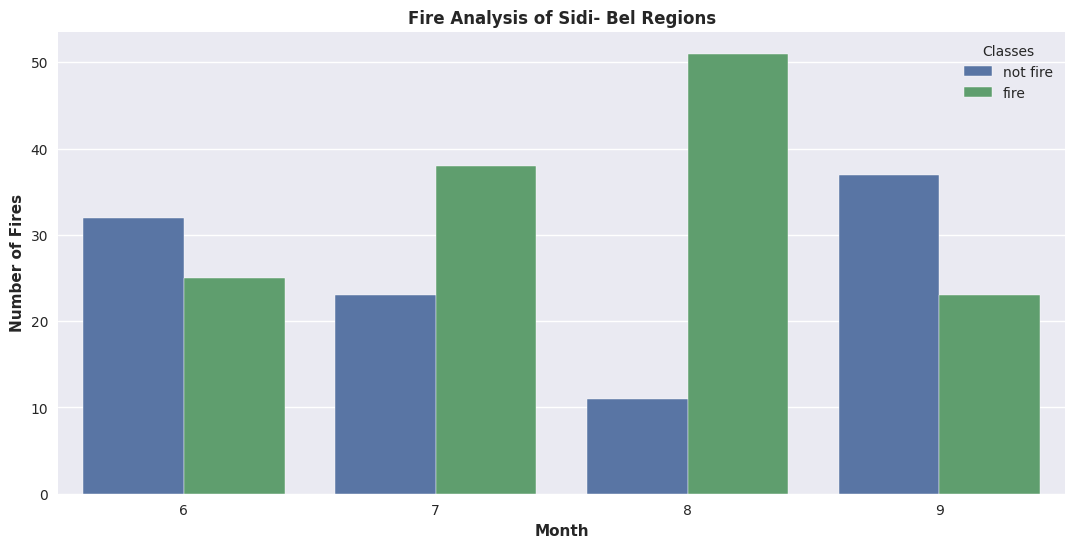

In [308]:
## MONTHLY FIRE ANANLYSIS
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brajia Regions')

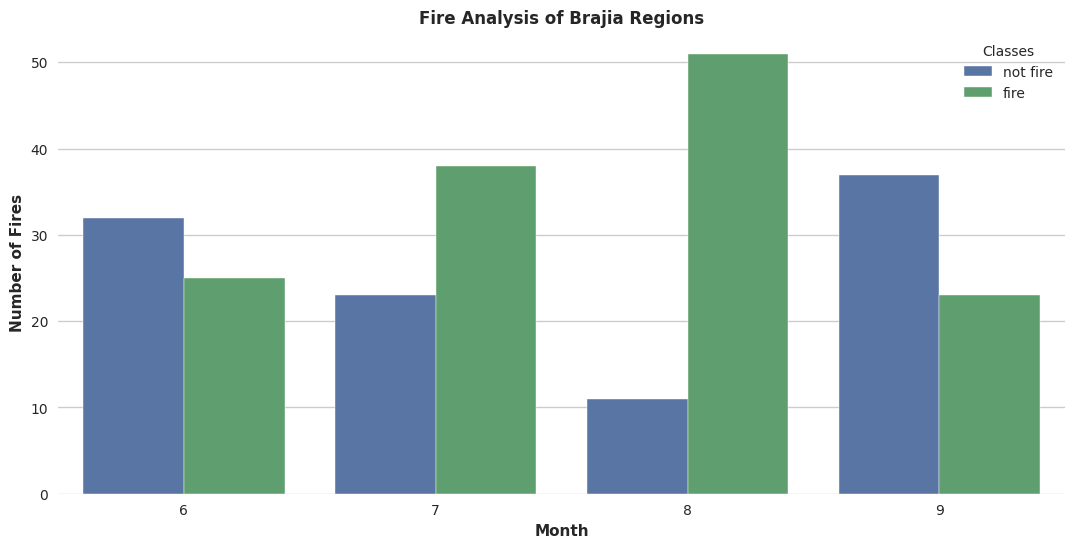

In [309]:
## MONTHLY FIRE ANANLYSIS
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title("Fire Analysis of Brajia Regions",weight='bold')

It is observed that the August and September had the most number of forest Fires for both the regions
and most of the fires happened in the month of: **June, July, August**
Least Fire was on the month **September**

# **Model Training**

In [328]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset.csv')

In [329]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [330]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [332]:
## drop month,day and year
df.drop(['month','day','year'],axis=1,inplace=True)

In [334]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [335]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,98
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [338]:
## encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [339]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [340]:
## INdependent and Dependent FEature

X=df.drop('FWI',axis=1)
Y=df['FWI']
print(X)
print(Y)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
235           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
236           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
237           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
238           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
239           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[240 rows x 11 columns]
0      0.5
1      0.4
2      0.1
3      0.0
4      

In [341]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [342]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [343]:
X_train.shape,X_test.shape

((180, 11), (60, 11))

In [344]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.665096,-0.360453,-0.323382,0.686284,0.493958,0.389320,0.606687,0.469450,0.515305,0.255838
RH,-0.665096,1.000000,0.267826,0.211859,-0.619356,-0.365434,-0.185669,-0.679593,-0.310633,-0.398770,-0.390461
Ws,-0.360453,0.267826,1.000000,0.303319,-0.229800,-0.021053,0.056838,-0.057932,0.008139,-0.108548,-0.194943
Rain,-0.323382,0.211859,0.303319,1.000000,-0.539117,-0.272096,-0.286354,-0.332135,-0.282768,-0.369215,-0.063139
FFMC,0.686284,-0.619356,-0.229800,-0.539117,1.000000,0.604497,0.508735,0.741871,0.589524,0.760663,0.233498
DMC,0.493958,-0.365434,-0.021053,-0.272096,0.604497,1.000000,0.876616,0.678726,0.983756,0.604478,0.178568
DC,0.389320,-0.185669,0.056838,-0.286354,0.508735,0.876616,1.000000,0.508458,0.946668,0.524998,-0.117323
ISI,0.606687,-0.679593,-0.057932,-0.332135,0.741871,0.678726,0.508458,1.000000,0.635813,0.739261,0.269961
BUI,0.469450,-0.310633,0.008139,-0.282768,0.589524,0.983756,0.946668,0.635813,1.000000,0.595964,0.072510
Classes,0.515305,-0.398770,-0.108548,-0.369215,0.760663,0.604478,0.524998,0.739261,0.595964,1.000000,0.150208


<Axes: >

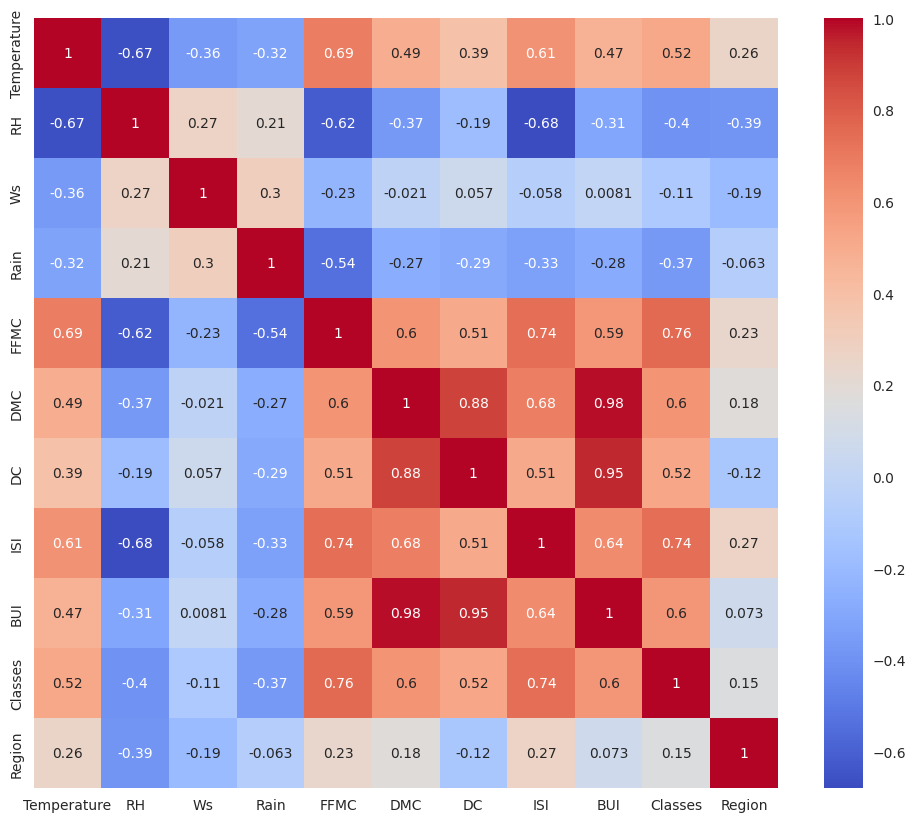

In [345]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [358]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j]) > threshold:
        colname=corr.columns[i]
        col_corr.add(colname)
      return col_corr

In [356]:
## threshold-Domain expertise
corr_features=correlation(X_train,0.85)

In [357]:
corr_features

set()

In [355]:
## drop features when correlation is more than 0.85
X_train.drop('BUI',axis=1,inplace=True)
X_test.drop('DC',axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 10), (60, 10))